# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# 1) seu código aqui
sinasc = pd.read_csv('../../modulo_5_limpeza_e_preparacao_de_dados/Tarefa 1/SINASC_RO_2019.csv')

# removendo duplicadas
sinasc.drop_duplicates().shape

# selecionando colunas de interesse
sinasc = sinasc[["APGAR1", "APGAR5", "SEXO", "GESTACAO", "ESTCIVMAE", "CONSULTAS"]]

# removendo as linhas não preenchidas
sinasc = sinasc[~sinasc["APGAR5"].isna()]
sinasc = sinasc[~sinasc["APGAR1"].isna()]
sinasc.isna().sum()

APGAR1          0
APGAR5          0
SEXO            4
GESTACAO     1216
ESTCIVMAE     315
CONSULTAS       0
dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

<Axes: xlabel='APGAR1', ylabel='count'>

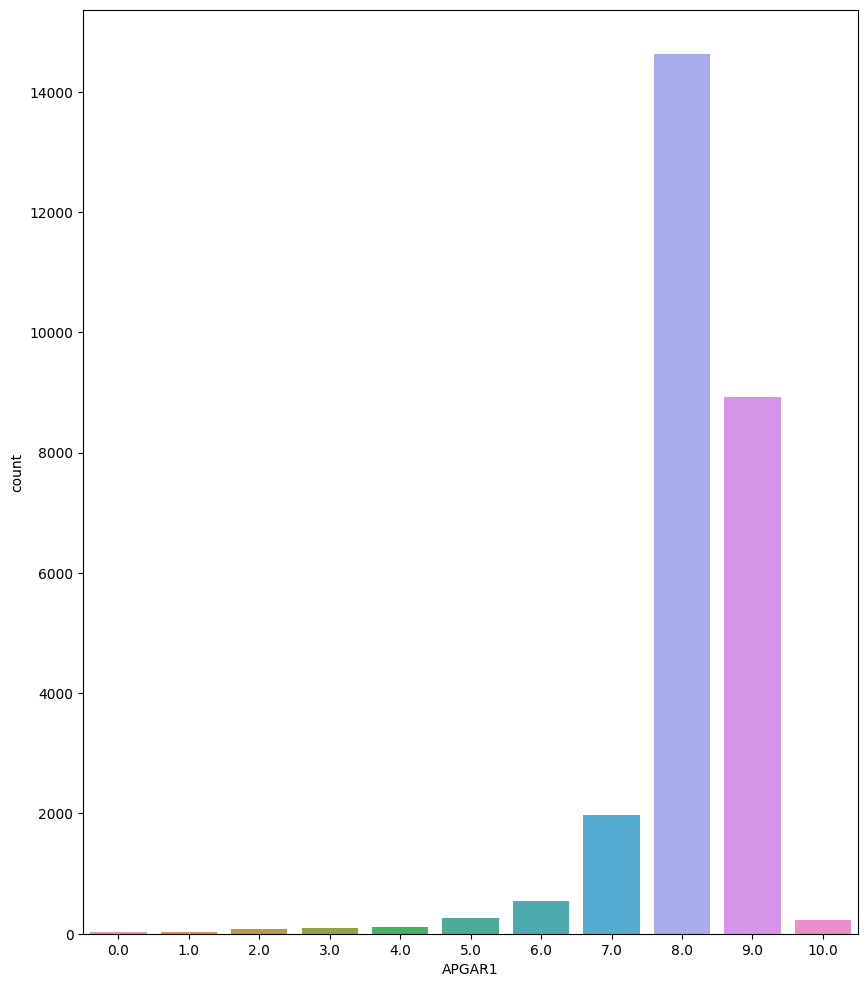

In [110]:
sns.countplot(x='APGAR1', data=sinasc)

<Axes: xlabel='APGAR5', ylabel='count'>

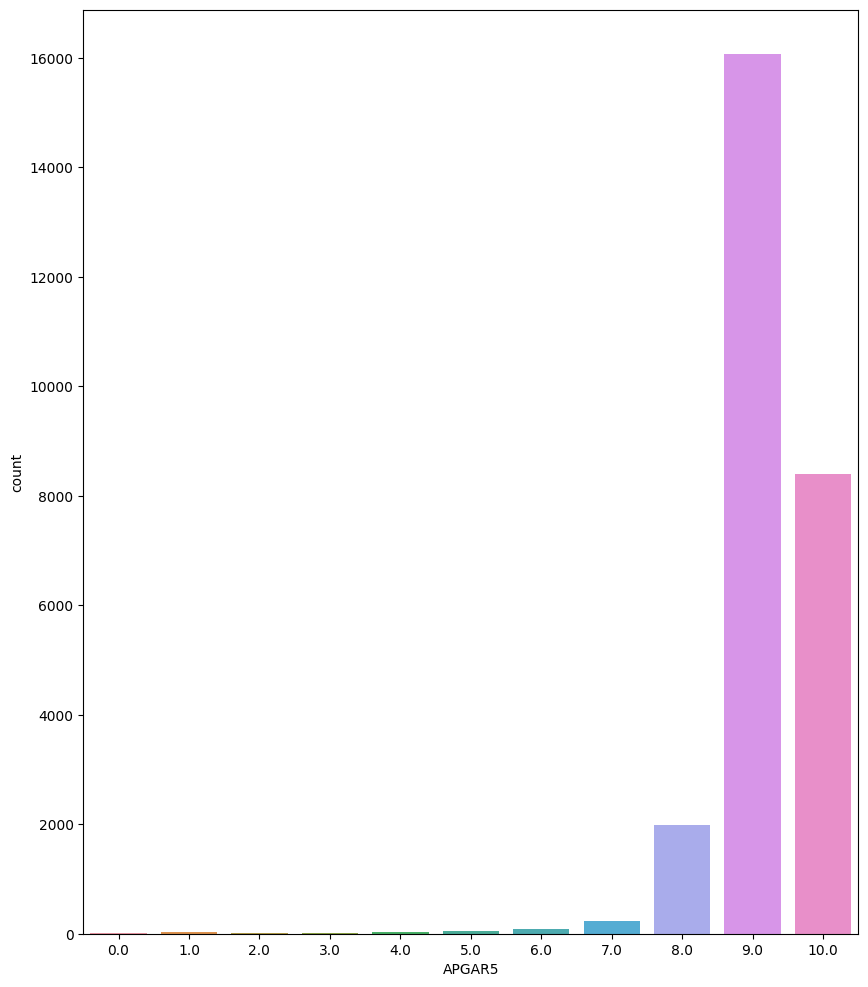

In [111]:
sns.countplot(x='APGAR5', data=sinasc)

<Axes: xlabel='SEXO', ylabel='count'>

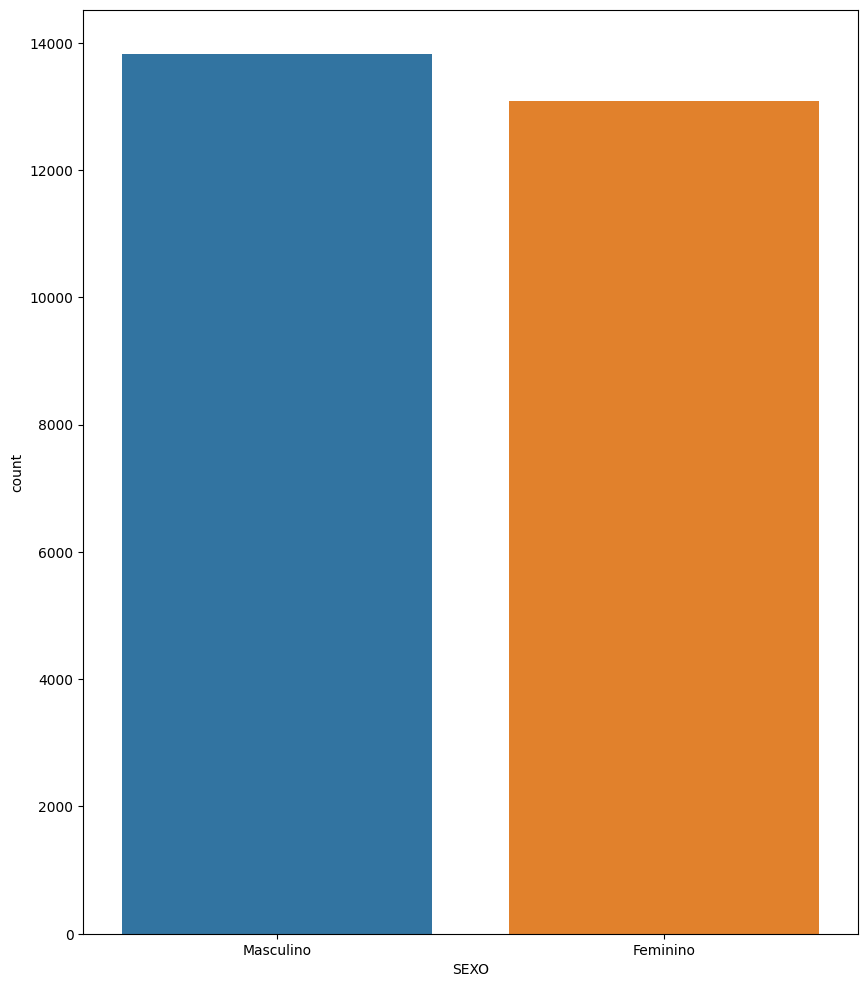

In [112]:
sns.countplot(x='SEXO', data=sinasc)

[Text(0, 0, '37 a 41 semanas'),
 Text(1, 0, '42 semanas e mais'),
 Text(2, 0, '32 a 36 semanas'),
 Text(3, 0, '22 a 27 semanas'),
 Text(4, 0, '28 a 31 semanas'),
 Text(5, 0, 'Menos de 22 semanas')]

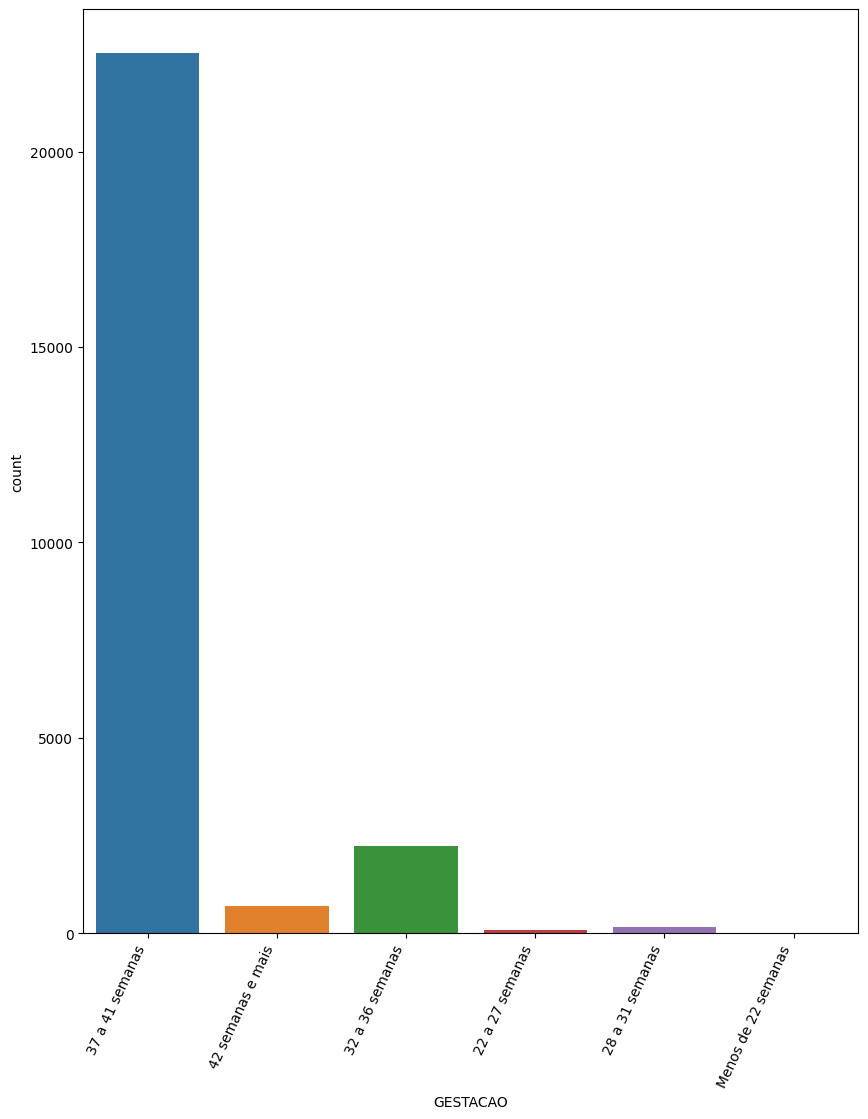

In [113]:
chart = sns.countplot(x='GESTACAO', data=sinasc)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right')

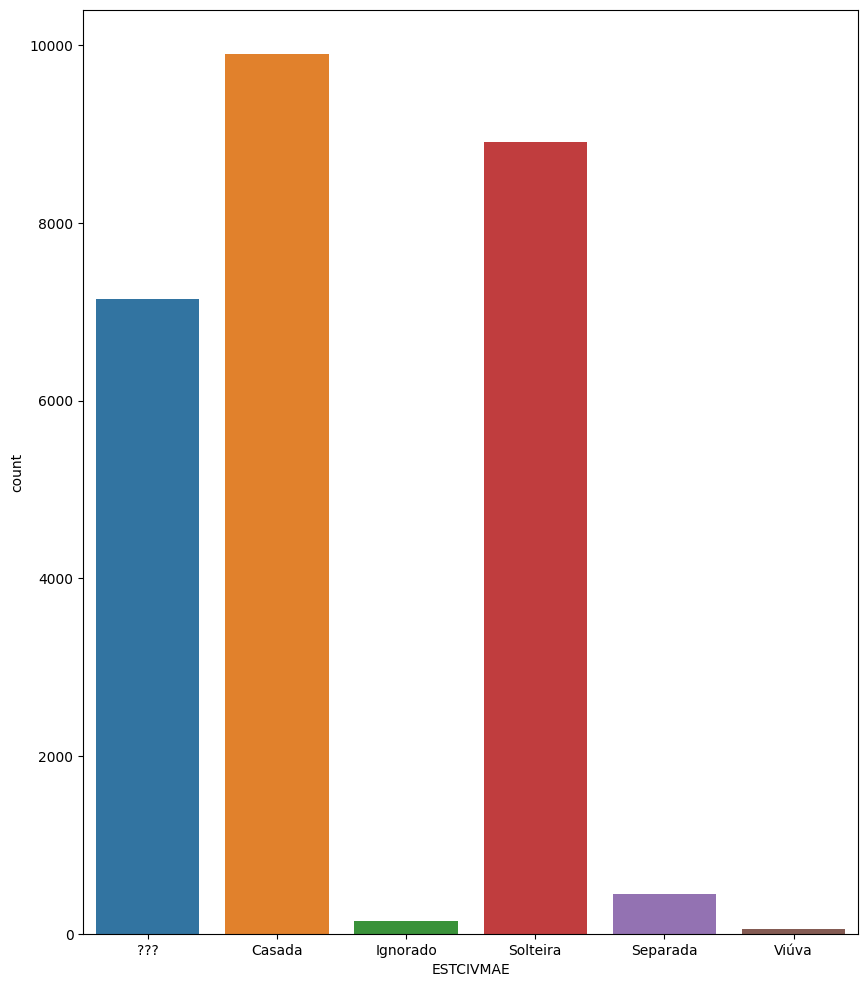

In [114]:
sinasc["ESTCIVMAE"] = sinasc["ESTCIVMAE"].replace(1.0, 'Solteira')
sinasc["ESTCIVMAE"] = sinasc["ESTCIVMAE"].replace(2.0, 'Casada')
sinasc["ESTCIVMAE"] = sinasc["ESTCIVMAE"].replace(3.0, 'Viúva')
sinasc["ESTCIVMAE"] = sinasc["ESTCIVMAE"].replace(4.0, 'Separada')
sinasc["ESTCIVMAE"] = sinasc["ESTCIVMAE"].replace(5.0, '???')
sinasc["ESTCIVMAE"] = sinasc["ESTCIVMAE"].replace(9.0, 'Ignorado')
chart = sns.countplot(x='ESTCIVMAE', data=sinasc)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='APGAR5', ylabel='CONSULTAS'>

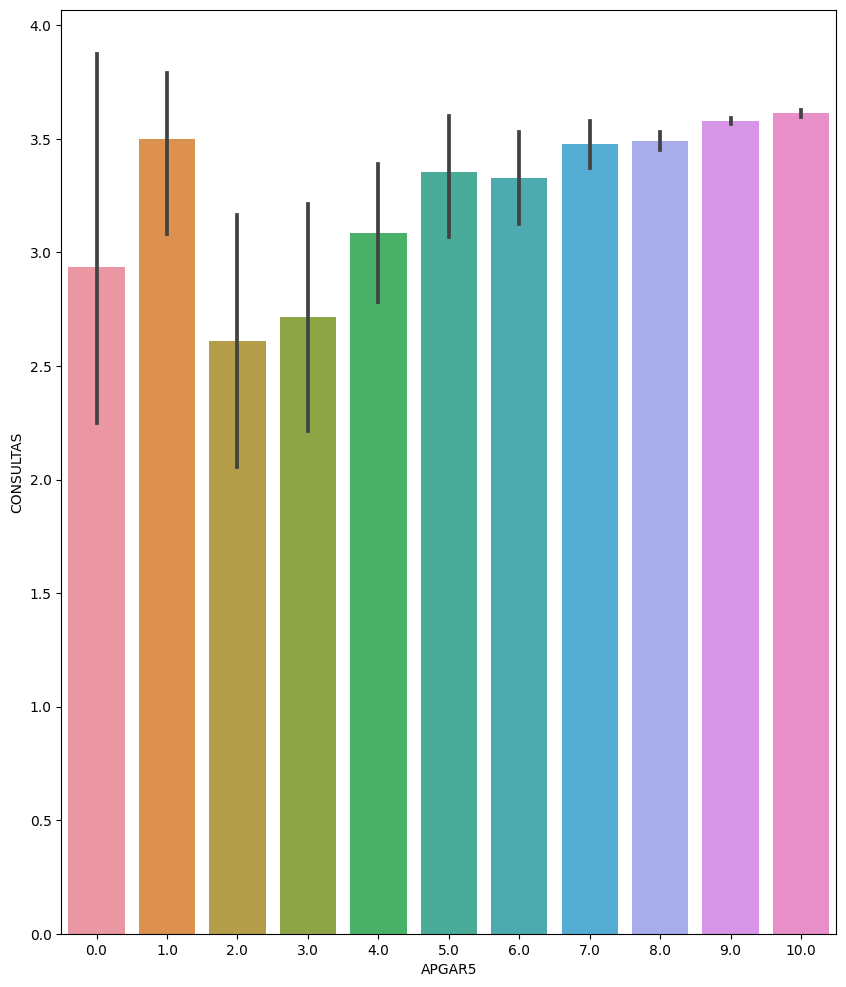

In [115]:
sns.barplot(x="APGAR5", y="CONSULTAS", data=sinasc)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

[Text(0, 0, '37 a 41 semanas'),
 Text(1, 0, '42 semanas e mais'),
 Text(2, 0, '32 a 36 semanas'),
 Text(3, 0, '22 a 27 semanas'),
 Text(4, 0, '28 a 31 semanas'),
 Text(5, 0, 'Menos de 22 semanas')]

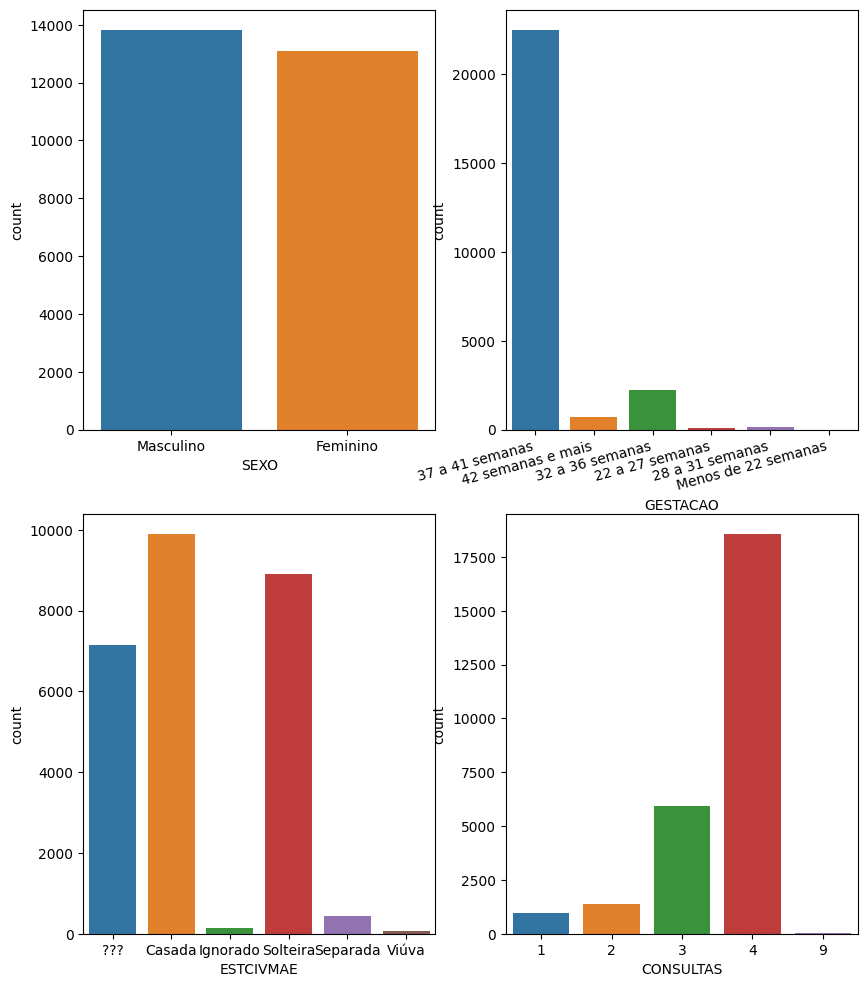

In [116]:
plt.close('all')
plt.rc('figure', figsize=(10, 12))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x="SEXO", data=sinasc)
chart = sns.countplot(ax = axes[0, 1], x="GESTACAO", data=sinasc)
sns.countplot(ax = axes[1, 0], x="ESTCIVMAE", data=sinasc)
sns.countplot(ax = axes[1, 1], x="CONSULTAS", data=sinasc)
chart.set_xticklabels(chart.get_xticklabels(), rotation=15, horizontalalignment='right')